In [120]:
from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
import editdistance
import matplotlib.pyplot as plt

In [121]:
def get_transliteration(s_w):
    '''
    Transliterates using indic_transliteration, does a little postediting
    '''
    trans = transliterate(s_w, sanscript.DEVANAGARI, sanscript.OPTITRANS)
    trans = trans.rstrip('a')
    trans = trans.replace('M','n')
    trans = trans.replace('A', 'aa')
    trans = trans.lower()
    return trans
    
    

In [122]:
def get_editdistance_stats(trans_pairs):
    '''
    Finds edit_dist/max_edit_dist for each pair, plots histogram of scores
    '''
    scores = [float((editdistance.eval(pair[0], pair[1]))/max(len(pair[0]), len(pair[1]))) for pair in trans_pairs]
    plt.hist(scores,50)
    max_score, min_score, mean_score = max(scores), min(scores), sum(scores)/len(scores)
    return scores, max_score, min_score, mean_score

In [123]:
#getting gold data
corpus = open("trans_corpus.txt","r").read().split("\n")
gold_source = [pair.split("\t")[1] for pair in corpus]
gold_target = [pair.split("\t")[0] for pair in corpus]
print(gold_source[:10])
print(gold_target[:10])

['हजगिरी', 'चेकॉव', 'स्पिनगार्न', 'मेडल', 'चेत्तिनाद', 'हरी', 'भूमि', 'थॉम्सन', 'हनुमान', 'अभिनेत्री']
['hajagiree', 'chekaanv', 'spinagaarn', 'medal', 'chetthinaad', 'hari', 'bhoomi', 'yaanhmsan', 'hanumaan', 'abhinetri']


1.0 0.0 0.29521129270400803


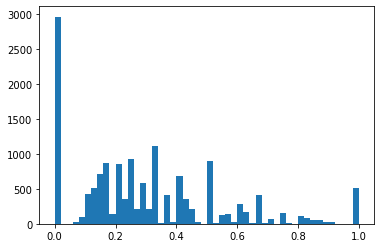

In [124]:
output = [get_transliteration(s_w) for s_w in gold_source]
scores, max_score, min_score, mean_score = get_editdistance_stats(list(zip(gold_target, output)))
print(max_score, min_score, mean_score)

In [127]:
bad_pairs = [(gold_target[idx], output[idx]) for idx in range(len(gold_target)) if scores[idx]>=0.5]
print("Missed words: ", len(bad_pairs)/len(gold_target))
# for p in bad_pairs:
#     print(p)

Missed words:  0.21422347342315168


In [126]:
len(gold_target)

14919

1.0 0.0 0.8643102773481814
Words that wrongly make it:  0.002681144848850459
[('sudip', 'suri'), ('havange', 'apane'), ('ranja', 'fraanja़'), ('kaag', 'kaa'), ('shor', 'phort'), ('laurenishan', 'jankshan'), ('fort', 'phort'), ('fort', 'phort'), ('devnarayan', 'sevaaraam'), ('anoora', 'ankolaa'), ('aatik', 'aataa'), ('samrat', 'saurabh'), ('daarnet', 'haart'), ('saavan', 'daaman'), ('kardiaa', 'raadhikaa'), ('amman', 'amar'), ('shadi', 'shri'), ('kamaal', 'janaral'), ('aagaasoud', 'aazaad'), ('barbara', 'haarbar'), ('mahananda', 'mahamud'), ('dastan', 'dayaan'), ('enis', 'emis'), ('daim', 'daim'), ('gaziabad', 'aazaad'), ('sati', 'ati'), ('niramay', 'horamaz'), ('chirantan', 'chimaa'), ('shahar', 'shatadru'), ('baragaav', 'barataॉn'), ('denis', 'zenos'), ('niyamur', 'iyar'), ('begusaray', 'bezubaan'), ('kunwari', 'yasunaari'), ('gurabchan', 'grahan'), ('prasoon', 'pradyot'), ('aahanith', 'mohanish'), ('hawnking', 'haaiking'), ('kaustav', 'kasam'), ('copran', 'gopan')]


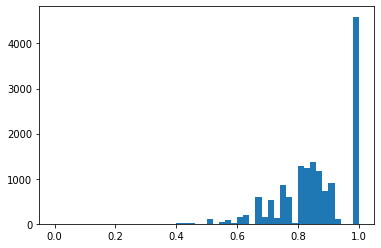

In [129]:
#Seeing what happens with random Hindi and English words
random.shuffle(gold_target)
random.shuffle(output)
scores, max_score, min_score, mean_score = get_editdistance_stats(list(zip(gold_target, output)))
print(max_score, min_score, mean_score)
bad_pairs = [(gold_target[idx], output[idx]) for idx in range(len(gold_target)) if scores[idx]<0.5]
print("Words that wrongly make it: ", len(bad_pairs)/len(gold_target))
print(bad_pairs)

[('art', 'aart'), ('sentar', 'sent')]


In [108]:
data = "मर्डर"
print(transliterate(data, sanscript.DEVANAGARI, sanscript.OPTITRANS))

marDara
